# Run Topas from Jupyter
* Version 1.6
* Last update: 2017/12/08
* Created by Anders Bank Blichfeld and Susanne Linn Skjærvø
--------------------------------------------------------------------------------------------------------------------------------
1. Save this notebook anywhere
2. Make a folder in this directory with the datafile extension as a name (i.e. xye, dat, raw etc.) and put all datafiles in it. 
3. Put the .inp file in the directory above
4. Replace the 'directory+filename' in the .inp file with "IN_FILE.xye". Add "DATASET" wherever you want only the filename to be rendered (i.e. same as for batch refinements with 'topas_batch_initial.bat').  
5. Make sure all directories and files are listed correctly below. 
6. Run the script.


- To be able to generate plots of the refined patterns, a macro called "macro Out_X_Yobs_Ycalc_Difference(file)" must be added to 'C:/Topas5/local.inc', and then added as one of the output parameters in the .inp file. Ask Susanne or Ola for details.

- The current script should work for all files with namestyle: 'as_long_as_you_want_1234.xye' or 'as_long_as_you_want.xye'

- It should be noted that there is a difference between version 2.x and 3.x of Python in how the Topas output code is rendered. While version 2 will output ascii, version 3 will give you bytes. The current script should work for both, but if you are having problems write 'line' instead of 'line.decode('ascii')'.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import time as t
import pylab as pl
from IPython.display import Audio, display
from IPython import display
import os, subprocess, re, shutil
import progressbar

## Directories and files

#### User defined

In [5]:
Inp_file='name.inp'                                          # name of input file
ext = 'xye'                                                                           # datafile extension
directory1='C:/Batch_refinements/Example/'                       # working directory
directory2=directory1+'xye/'     # folder of datafiles
directory3=directory2+'output/'                                                       # folder for output files
#directory1=os.getcwd()+                                                              # if you want the directory of the notebook to define working space (does not work for UNC paths)

In [6]:
if not os.path.exists(os.path.dirname(directory3)):
    os.makedirs(os.path.dirname(directory3))                                          # make directory for output

## Process parameters

#### User defined

In [60]:
plotfig = 1                       # 1: graphical output of refinement (makes process slower), 0: text output
plotstats = 1                     # 1: graphical output of statistics (makes process slower)                   
printall = 0                      # 1: print full refinement output, 0: print only most essential
pause = 0                         # 1: if you want extra time to look at output of each refinement (problems with stopping loop: click 'restart & clear output' in kernel dropdown menu)

start =0                      # Define the filenumbers you want to refine here
end = 300
keywords=['DATASET', 'IN_FILE', 'RESULTS']   # keywords you want to replace in your .inp file, make sure pattern_str and replace_str has equally many arguments

In [61]:
all_files = directory2
all_data=[]
for filename in os.listdir(all_files):
    if filename.endswith(".%s"%(ext)): 
        all_data+=[all_files+filename]
        continue
    else:
        continue
all_data.sort()
print("Number of datafiles files found: %s"%len(all_data))
all_data=all_data[start:end]
print("Refining this many files: %s"%len(all_data))
#print(all_data)

Number of datafiles files found: 1063
Refining this many files: 300


## Run Topas

KeyboardInterrupt: 

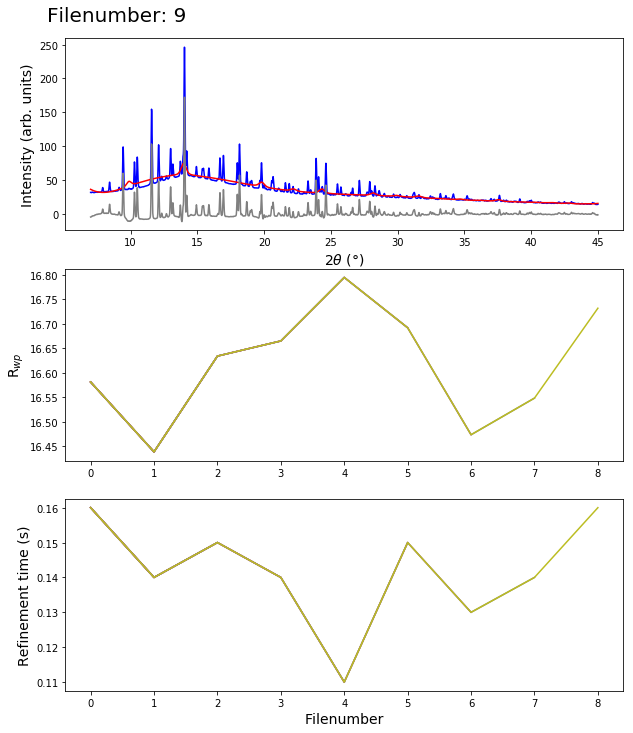

In [62]:
if plotfig == 1:
    fig=plt.figure(figsize=(10,12), facecolor='w')
if plotstats == 1:
    fig=plt.figure(figsize=(10,12), facecolor='w')
if plotfig == 1:
    printall == 0
Rwp=[]
time=[]
no =[]
count=1
for file in all_data:
    Base=os.path.splitext(os.path.basename(file))[0]                     # filenames of the datafiles without the extension
    resultsfile = directory1+Inp_file.split('_')[-2]+'_'+Inp_file.split('_')[-1].strip('.inp')+'.txt'
    temp_inp=directory3+Base+os.path.splitext(directory1+Inp_file)[1]    # temporary variable making individual inputfiles for every datafile
    shutil.copy(directory1+Inp_file,temp_inp)                            # copies the .inpfile in directory1 to directory2 and gives it the same name as the datafile 
    if plotfig !=1 and plotstats == 0:
        print('   '+Base+'.inp')
    pattern_str=keywords                                   
    replace_str=[Base, directory2+Base, resultsfile]                     # this is what you want to replace the keywords with (make sure patter_str and replace_str has the same amounts of arguments)
    for i,word in enumerate(pattern_str):                                # this loop replaces all the keywords you have set
        with open(temp_inp) as f:
            s = f.read()
        
        with open(temp_inp,'w') as f:
            s = s.replace(pattern_str[i],replace_str[i])
            f.write(s)
            
    cmd = 'C:/TOPAS5/tc %s' %(temp_inp)                                  # setting inputparameter for command prompt
   

    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)               # launching Topas from the command prompt
    line_save=[]
    for line in process.stdout:                                          # retrieves certain parts of the refinement output
        if plotfig !=1 and printall == 1 and plotstats == 0:
            print(line.decode('ascii'))                        
        if re.search(b'seconds',line):
            if plotfig != 1 and printall !=1 and plotstats == 0:
                print('   '+' '+line_save.decode('ascii'))
            else:
                Rwp.append(float(line_save.decode('ascii')[24:33]))
                time.append(float(line_save.decode('ascii')[12:17]))
                try:
                    no.append(int(os.path.splitext(os.path.basename(file))[0][-4:].strip('p')))
                except: 
                    no.append(count)
                    count=count+1
        line_save=line
    

    if plotfig == 1:                                                     # plots the retrieved data from the refinement output        
        refinement=np.loadtxt(directory2+Base+'.txt')   
        plt.subplot(311, facecolor='w')
        plt.cla()
        plt.figtext(0.1,0.9, 'Filenumber: %s'%(no[-1]), fontsize=20, backgroundcolor='w')
        plt.xlabel(r'2$\theta$ ($\degree$)', fontsize=14)
        plt.ylabel('Intensity (arb. units)', fontsize=14)
        pl.plot(refinement[:,0], refinement[:,1], color='b')
        pl.plot(refinement[:,0], refinement[:,2], color='r')
        pl.plot(refinement[:,0], refinement[:,3], color='grey')
        display.clear_output(wait=True)
        display.display(pl.gcf())
    if plotstats == 1:         
        plt.subplot(312, facecolor='w')            
        plt.ylabel('R$_{wp}$', fontsize=14)
        pl.plot(no, Rwp)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        
        plt.subplot(313)  
        plt.xlabel('Filenumber', fontsize=14)
        plt.ylabel('Refinement time (s)', fontsize=14)
        pl.plot(no, time)
        display.clear_output(wait=True)
        display.display(pl.gcf()) 
    if pause == 1:
        t.sleep(5)
        input("Press Enter to continue...")
        
def allDone():
    display.display(Audio('C:/Batch_refinements/Alesis-Fusion-Tubular-Bells-C6.wav', autoplay=True))
allDone()